In [1]:
install.packages("Lahman")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
install.packages("data.table")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library("Lahman")

In [4]:
library("data.table")

In [5]:
teams = as.data.table(Teams)

In [6]:
## model1 = lm(data$readingScore ~ data$grade + data$male + data$raceeth + data$preschool + data$expectBachelors 
#            + data$motherHS + data$motherBachelors + data$motherWork + data$fatherHS + data$fatherBachelors + data$fatherWork
#            + data$selfBornUS +data$motherBornUS + data$fatherBornUS + data$englishAtHome + data$computerForSchoolwork
#            + data$read30MinsADay + data$minutesPerWeekEnglish + data$studentsInEnglish + data$schoolHasLibrary
#            + data$publicSchool + data$urban + data$schoolSize,data = data)
# summary(model1)

In [7]:
teams = teams[, .(yearID, 
                  lgID = as.character(lgID), 
                  teamID = as.character(teamID), 
                  franchID = as.character(franchID),
                  Rank, G, W, L, R, ERA, SO, 
                  WinPercent = W/(W+L))]

In [8]:
salaries = as.data.table(Salaries)

In [9]:
salaries = salaries[, c("lgID", "teamID", "salary1M") := 
                      list(as.character(lgID), as.character(teamID), salary / 1e6L)]

In [10]:
payroll = salaries[, .(payroll = sum(salary1M)), by=.(teamID, yearID)]

In [11]:
teamPayroll = merge(teams, payroll, by=c("teamID","yearID")) #merge teams and payroll data sets together

In [12]:
head(teamPayroll) 

teamID,yearID,lgID,franchID,Rank,G,W,L,R,ERA,SO,WinPercent,payroll
ANA,1997,AL,ANA,2,162,84,78,829,4.52,953,0.5185185,31.13547
ANA,1998,AL,ANA,2,162,85,77,787,4.49,1028,0.5246914,41.28100
ANA,1999,AL,ANA,4,162,70,92,711,4.79,1022,0.4320988,55.38817
ANA,2000,AL,ANA,3,162,82,80,864,5.00,1024,0.5061728,51.46417
ANA,2001,AL,ANA,3,162,75,87,691,4.20,1001,0.4629630,47.53517
ANA,2002,AL,ANA,2,162,99,63,851,3.69,805,0.6111111,61.72167


In [13]:
head(teamPayroll) #all payroll data

teamID,yearID,lgID,franchID,Rank,G,W,L,R,ERA,SO,WinPercent,payroll
ANA,1997,AL,ANA,2,162,84,78,829,4.52,953,0.5185185,31.13547
ANA,1998,AL,ANA,2,162,85,77,787,4.49,1028,0.5246914,41.28100
ANA,1999,AL,ANA,4,162,70,92,711,4.79,1022,0.4320988,55.38817
ANA,2000,AL,ANA,3,162,82,80,864,5.00,1024,0.5061728,51.46417
ANA,2001,AL,ANA,3,162,75,87,691,4.20,1001,0.4629630,47.53517
ANA,2002,AL,ANA,2,162,99,63,851,3.69,805,0.6111111,61.72167


In [14]:
teamPayrollP <- teamPayroll[yearID >= "2000"]

In [15]:
head(teamPayrollP)

teamID,yearID,lgID,franchID,Rank,G,W,L,R,ERA,SO,WinPercent,payroll
ANA,2000,AL,ANA,3,162,82,80,864,5.00,1024,0.5061728,51.46417
ANA,2001,AL,ANA,3,162,75,87,691,4.20,1001,0.4629630,47.53517
ANA,2002,AL,ANA,2,162,99,63,851,3.69,805,0.6111111,61.72167
ANA,2003,AL,ANA,3,162,77,85,736,4.28,838,0.4753086,79.03167
ANA,2004,AL,ANA,1,162,92,70,836,4.28,942,0.5679012,100.53467
ARI,2000,NL,ARI,3,162,85,77,792,4.35,975,0.5246914,81.02783


In [5]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library("ggplot2") #load ggplot2 package

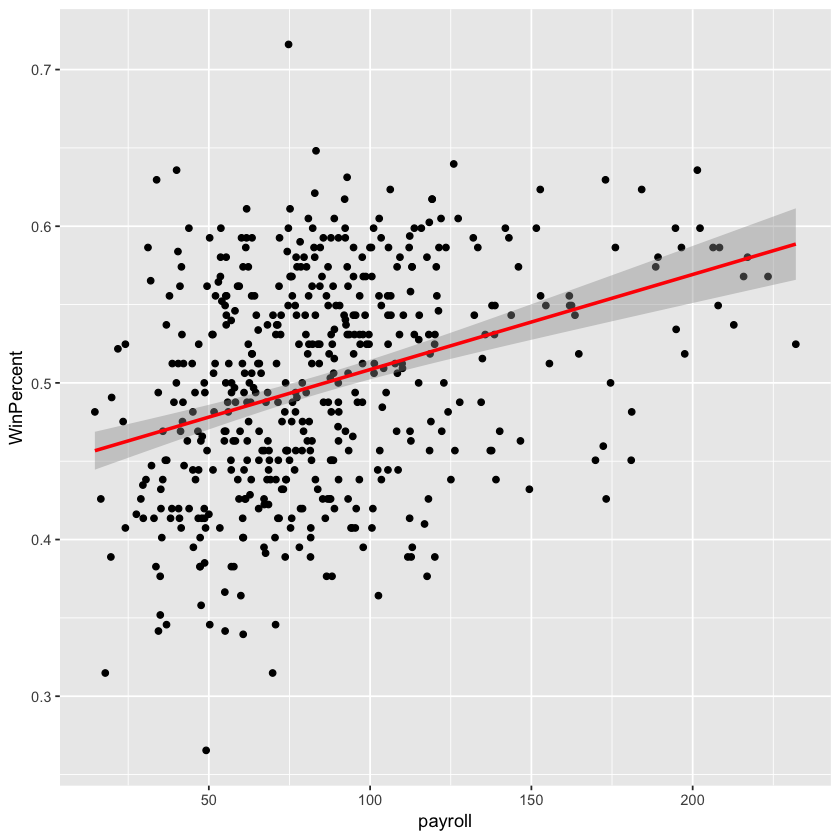

In [18]:
ggplot(teamPayrollP, #linear regression graph of payroll and winpercentage
       aes(x= payroll, y = WinPercent)) +geom_point() + stat_smooth(method = "lm", col = "red") 

In [19]:
require(ggplot2)
#> Loading required package: ggplot2

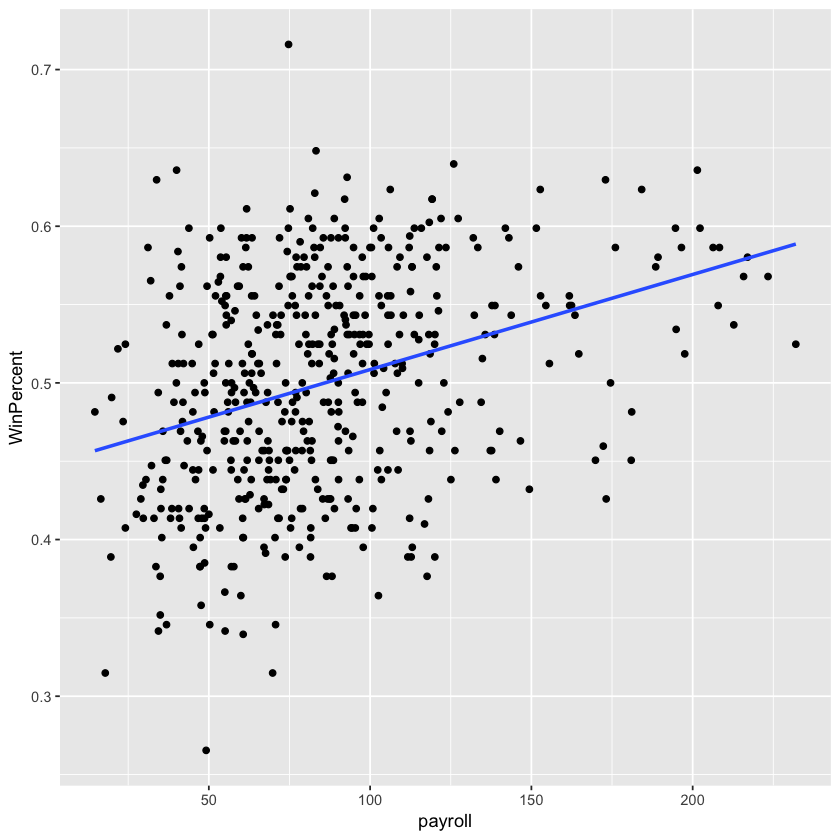

In [20]:
ggplot(data = teamPayrollP, mapping = aes(x = payroll, y = WinPercent)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

In [21]:
summary(lm(formula = WinPercent ~ payroll, data = teamPayrollP))


Call:
lm(formula = WinPercent ~ payroll, data = teamPayrollP)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.212213 -0.050765  0.003051  0.052022  0.222892 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.478e-01  7.164e-03  62.507  < 2e-16 ***
payroll     6.070e-04  7.653e-05   7.933 1.43e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06625 on 497 degrees of freedom
Multiple R-squared:  0.1124,	Adjusted R-squared:  0.1106 
F-statistic: 62.92 on 1 and 497 DF,  p-value: 1.432e-14


In [22]:
g2<-ggplot(teamPayrollP,aes(WinPercent,payroll))+geom_point()+geom_smooth(method = "lm")

In [23]:
library(ggplot2)
# Basic density

In [24]:
p<- ggplot(teamPayrollP, aes(x=payroll)) + 
  geom_density()
# Add mean line

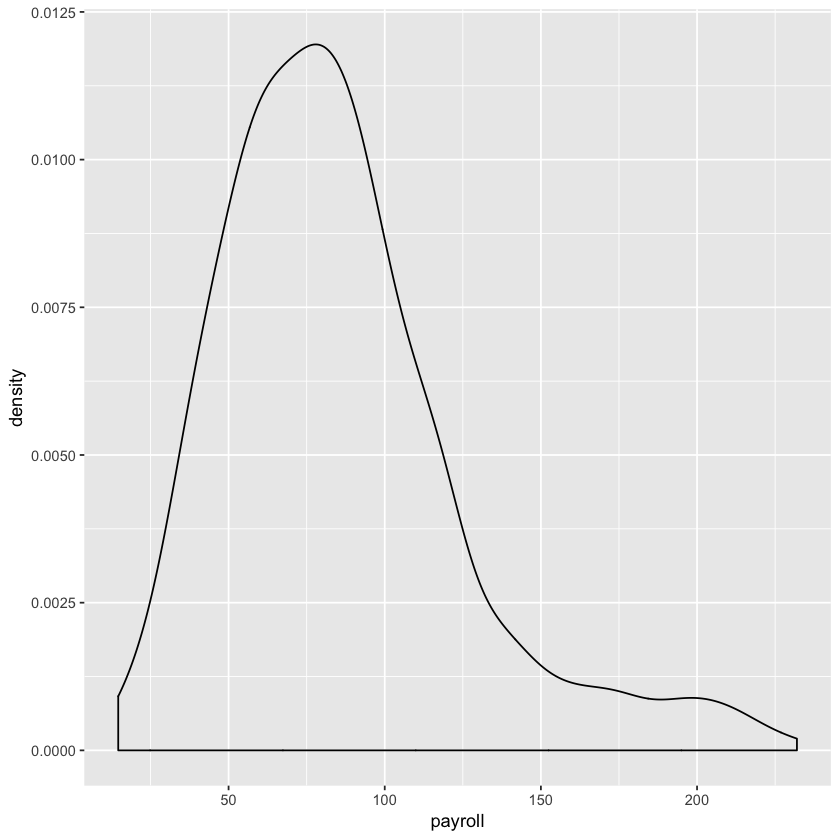

In [25]:
ggplot(teamPayrollP, aes(x=payroll)) + geom_density()

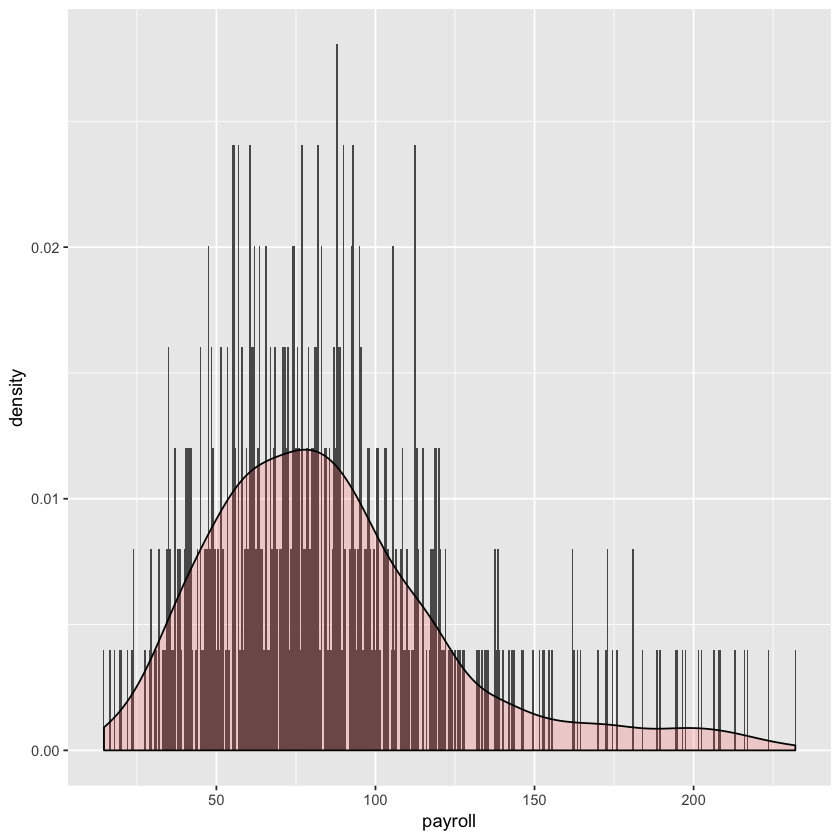

In [26]:
ggplot(teamPayrollP, aes(x = payroll)) +
  geom_histogram(aes(y = ..density..), # the histogram will display "density" on its y-axis
                 binwidth = .5) +
  geom_density(alpha = .2, fill="#FF6655") #overlay with a transparent (alpha value) density plot

In [27]:
library("ggExtra")

In [28]:
install.packages("ggExtra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [29]:
library("ggExtra")

In [30]:
set.seed(30)
p <- ggplot(teamPayrollP, aes(x=payroll, y=WinPercent)) + geom_point()

In [31]:
head(teamPayrollP)

teamID,yearID,lgID,franchID,Rank,G,W,L,R,ERA,SO,WinPercent,payroll
ANA,2000,AL,ANA,3,162,82,80,864,5.00,1024,0.5061728,51.46417
ANA,2001,AL,ANA,3,162,75,87,691,4.20,1001,0.4629630,47.53517
ANA,2002,AL,ANA,2,162,99,63,851,3.69,805,0.6111111,61.72167
ANA,2003,AL,ANA,3,162,77,85,736,4.28,838,0.4753086,79.03167
ANA,2004,AL,ANA,1,162,92,70,836,4.28,942,0.5679012,100.53467
ARI,2000,NL,ARI,3,162,85,77,792,4.35,975,0.5246914,81.02783


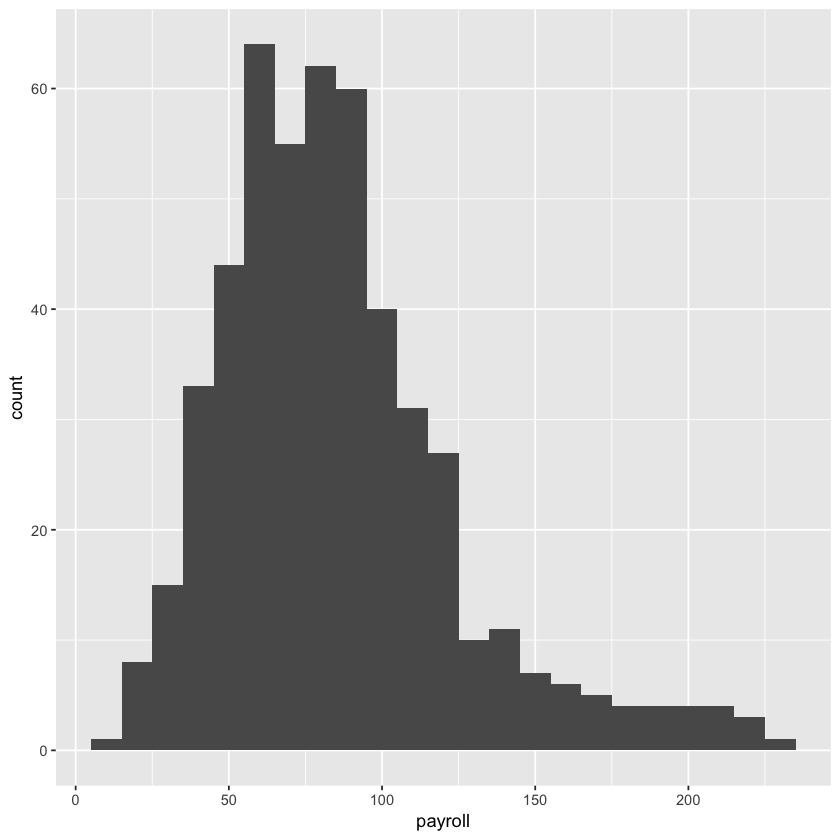

In [32]:
ggplot(teamPayrollP, aes(payroll)) + geom_histogram(binwidth=10)

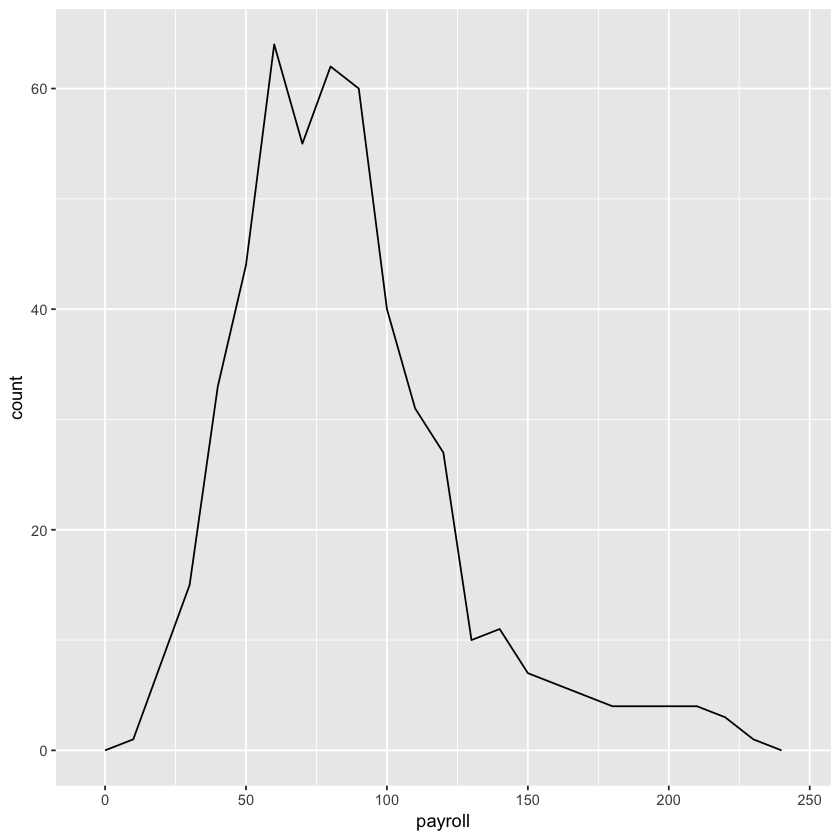

In [34]:
ggplot(teamPayrollP, aes(payroll)) + geom_freqpoly(binwidth=10)

In [7]:
moneyball <- read.csv("baseball.csv")

In [8]:
dataBefore2000 <- subset(moneyball, Year < 2000)

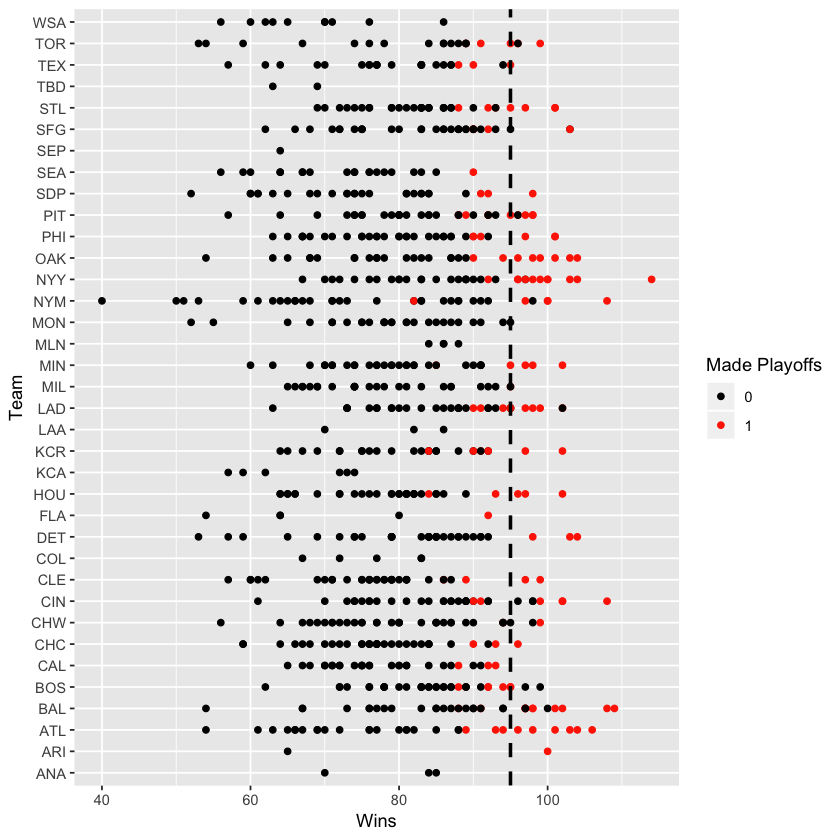

In [9]:
m <- ggplot(dataBefore2000, aes(x = W,
                               y = Team,
                               color = factor(Playoffs))) +
geom_point() + scale_color_manual(values = c("#000000", "#FF2D00"), name = "Made Playoffs")

m + geom_vline(aes(xintercept = 95), color = "black", linetype = "dashed", size=1) + xlab("Wins")

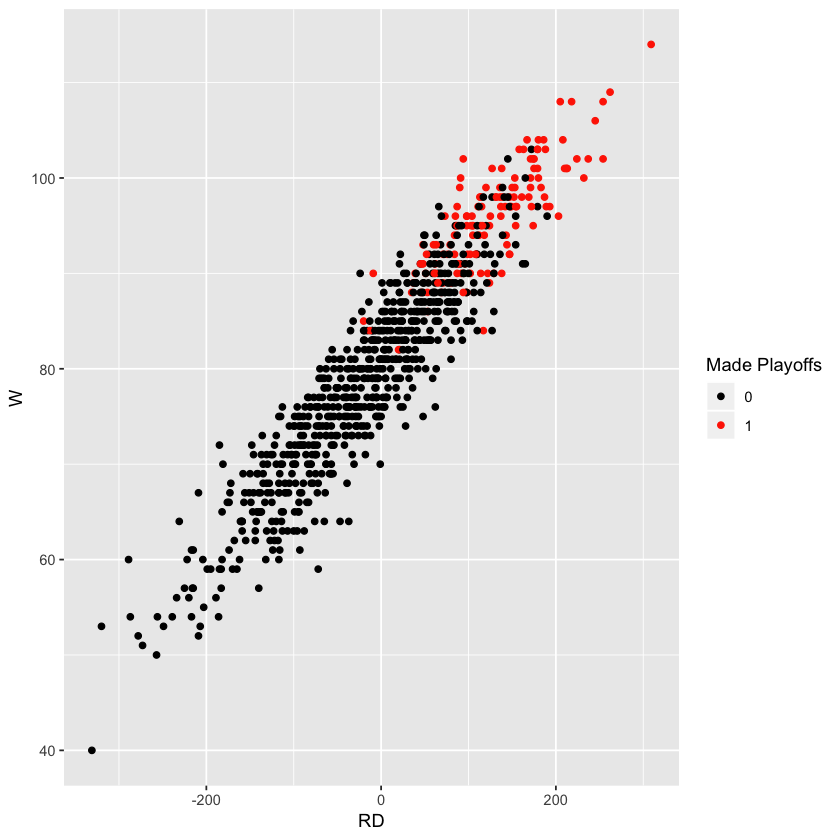

In [11]:
dataBefore2000$RD <- dataBefore2000$RS - dataBefore2000$RA

ggplot(dataBefore2000, aes(x = RD,
                            y = W,
                            color = factor(Playoffs))) +
     geom_point() + scale_color_manual(values = c("#000000", "#FF2D00"), name = "Made Playoffs")

In [13]:
winsReg <- lm(W ~ RD, data = dataBefore2000)
winsReg


Call:
lm(formula = W ~ RD, data = dataBefore2000)

Coefficients:
(Intercept)           RD  
    80.8777       0.1064  


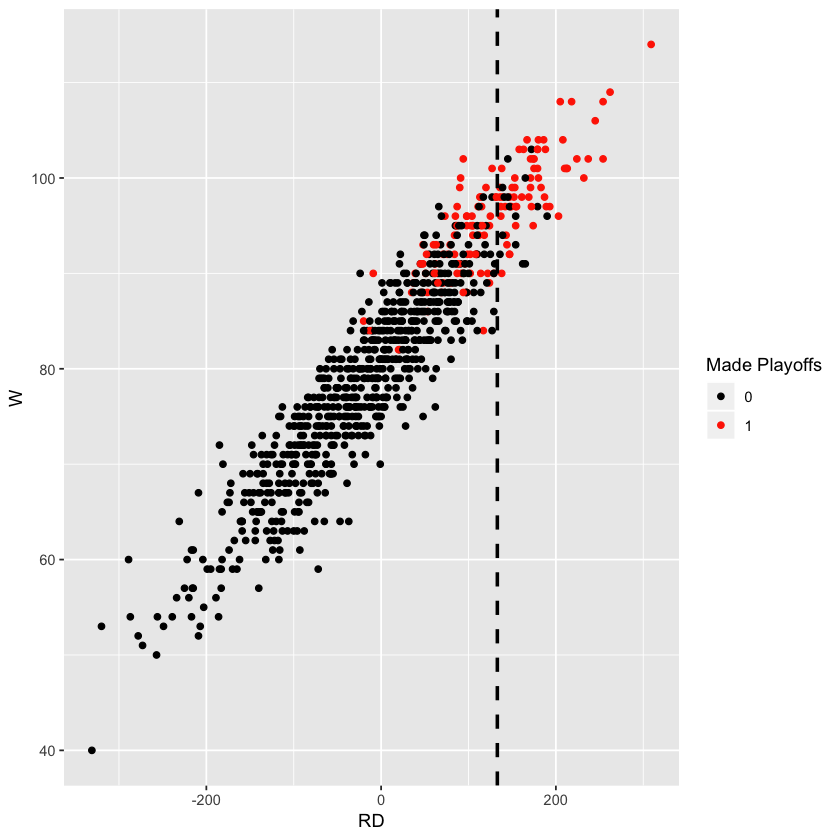

In [15]:
ggplot(dataBefore2000, aes(x = RD,
                            y = W,
                            color = factor(Playoffs))) +
     geom_point() + scale_color_manual(values = c("#000000", "#FF2D00"), name = "Made Playoffs") +
     geom_vline(aes(xintercept = 133), color = "black", linetype = "dashed", size=1)